In [1]:
#import library
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import os
from glob import glob

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras import layers
from keras import Model, Input
from keras.applications.densenet import DenseNet201
from pathlib import Path
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# koneksi database
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/data/data_penyu')

In [4]:
# Directory with our training horse pictures
train_dir = os.path.join('./latih')
validation_dir = os.path.join( './validasi')
test_dir = os.path.join( './uji')

#penyu Hijau
latih_hijau = os.path.join('./latih/Penyu Hijau')
#Penyu lekang
latih_lekang = os.path.join('./latih/Penyu Lekang')
#Penyu sisik
latih_sisik = os.path.join('./latih/Penyu Sisik')
#Penyu tempayan
latih_tempayan = os.path.join('./latih/Penyu Tempayan')

#validasi Hijau
validasi_Hijau = os.path.join('./validasi/Penyu Hijau')
#validasi Lekang
validasi_Lekang = os.path.join('./validasi/Penyu Lekang')
#validasi Sisik
validasi_Sisik = os.path.join('./validasi/Penyu Sisik')
#validasi Tempayan
validasi_Tempayan = os.path.join('./validasi/Penyu Tempayan')

#uji Hijau
uji_Hijau = os.path.join('./uji/Penyu Hijau')
#uji Lekang
uji_Lekang = os.path.join('./uji/Penyu Lekang')
#uji Sisik
uji_Sisik = os.path.join('./uji/Penyu Sisik')
#uji Tempayan
uji_Tempayan = os.path.join('./uji/Penyu Tempayan')

In [5]:
#cek label

image_dir = Path('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/data/data_penyu')
# latih
latih_dir = Path('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/data/data_penyu/latih')
# validasi
validasi_dir = Path('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/data/data_penyu/validasi')
# uji
uji_dir = Path('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/data/data_penyu/uji')

# Get filepaths and labels
filepaths_ = list(image_dir.glob(r'**/*.png'))
labels_ = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_))

# Get filepaths and labels latih
filepaths_latih = list(latih_dir.glob(r'**/*.png'))
labels_latih = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_latih))
# Get filepaths and labels validasi
filepaths_validasi = list(validasi_dir.glob(r'**/*.png'))
labels_validasi = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_validasi))
# Get filepaths and labels uji
filepaths_uji = list(uji_dir.glob(r'**/*.png'))
labels_uji = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_uji))



In [6]:
filepaths = pd.Series(filepaths_, name='Filepath').astype(str)
labels = pd.Series(labels_, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)



,Filepath,Label
0,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Lekang
1,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Hijau
2,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Tempayan


In [7]:
# latih
filepaths = pd.Series(filepaths_latih, name='Filepath').astype(str)
labels = pd.Series(labels_latih, name='Label')
# Concatenate filepaths_latih and labels
latih_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
latih_df = latih_df.sample(frac=1).reset_index(drop = True)

# Show the result
latih_df.head()



,Filepath,Label
0,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Sisik
1,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Sisik
2,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Lekang
3,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Tempayan
4,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Tempayan


In [8]:
# validasi
filepaths = pd.Series(filepaths_validasi, name='Filepath').astype(str)
labels = pd.Series(labels_validasi, name='Label')
# Concatenate filepaths_validasi and labels_validasi
validasi_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
validasi_df = validasi_df.sample(frac=1).reset_index(drop = True)

# Show the result
validasi_df.head(3)



,Filepath,Label
0,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Hijau
1,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Tempayan
2,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Lekang


In [9]:
# uji
filepaths = pd.Series(filepaths_uji, name='Filepath').astype(str)
labels = pd.Series(labels_uji, name='Label')
# Concatenate filepaths_uji and labels_uji
uji_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
uji_df = uji_df.sample(frac=1).reset_index(drop = True)

# Show the result
uji_df.head(3)

,Filepath,Label
0,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Sisik
1,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Lekang
2,/content/drive/MyDrive/Aknia/skripsi/Ensemble ...,Penyu Tempayan


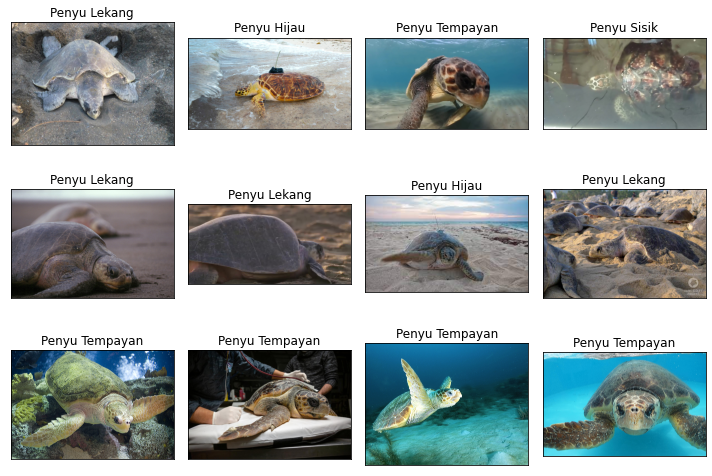

In [10]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

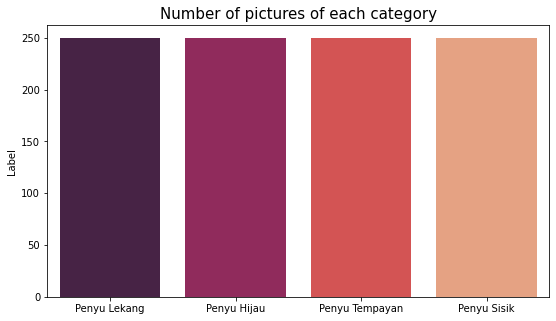

In [11]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

# Prepocessing

In [12]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator()
validasi_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_dataframe(dataframe=latih_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                         )
validasi_data = validasi_datagen.flow_from_dataframe(dataframe=validasi_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         class_mode = 'categorical'
                                         )
uji_data = validasi_datagen.flow_from_dataframe(dataframe=uji_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         class_mode = 'categorical'
                                         )

Found 800 validated image filenames belonging to 4 classes.
Found 100 validated image filenames belonging to 4 classes.
Found 100 validated image filenames belonging to 4 classes.


In [13]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

# Ensemble Inception dan resnet

In [19]:
# load model
densenet_model = tf.keras.models.load_model('/content/drive/MyDrive/Aknia/skripsi/Model baru/densenet/densenet.h5', compile=True)
inception_model = tf.keras.models.load_model('/content/drive/MyDrive/Aknia/skripsi/coba_modelCheckpoin/Inception_coba_sidang.h5', compile=True)
resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/Aknia/skripsi/Ensemble Model/ensemble/hasil_TL/percobaan_resnet152.h5', compile=True)

In [20]:
models = [inception_model,resnet_model]
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [21]:
optimizer = Adam(learning_rate=0.0001)

In [22]:
ensemble_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# EVALUASI 2 Model (Incep, Resnet)

In [23]:
metrics_train = ensemble_model.evaluate(train_data)
metrics_test = ensemble_model.evaluate(uji_data)

7/7 [==============================] - 100s 14s/step - loss: 0.0931 - accuracy: 1.0000


In [24]:
print(f"TRAIN_SET: {metrics_train}")
print("--------------------------------------------")
print(f"TEST_SET: {metrics_test}")

TRAIN_SET: [0.05322585627436638, 0.9975000023841858]
--------------------------------------------
TEST_SET: [0.09309611469507217, 1.0]


In [25]:
# Predict the label of the test_images
import numpy as np
pred = ensemble_model.predict(uji_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 4 predictions: {pred[:4]}')

The first 4 predictions: ['Penyu Hijau', 'Penyu Tempayan', 'Penyu Tempayan', 'Penyu Tempayan']


In [26]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(uji_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   Penyu Hijau       0.20      0.20      0.20        25
  Penyu Lekang       0.16      0.16      0.16        25
   Penyu Sisik       0.28      0.28      0.28        25
Penyu Tempayan       0.32      0.32      0.32        25

      accuracy                           0.24       100
     macro avg       0.24      0.24      0.24       100
  weighted avg       0.24      0.24      0.24       100



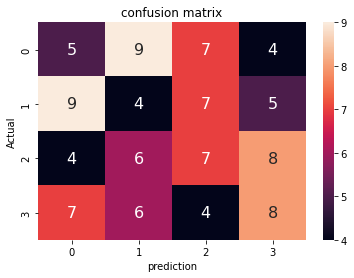

In [27]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [28]:
ensemble_model.save('/content/drive/MyDrive/Aknia/skripsi/bismillah/Ensemble/Ensemble_2_model_Inceptionv3_Resnet152.h5')

# Ensemble Inception dan densenet

In [29]:
models_1 = [inception_model,densenet_model]
model_outputs_1 = [model(model_input) for model in models_1]
ensemble_output_1 = tf.keras.layers.Average()(model_outputs_1)
ensemble_model_1 = tf.keras.Model(inputs=model_input, outputs=ensemble_output_1)

In [30]:
optimizer = Adam(learning_rate=0.0001)

In [31]:
ensemble_model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# EVALUASI 2 Model (Incep, DenseNet)

In [32]:
metrics_train = ensemble_model_1.evaluate(train_data)
metrics_test = ensemble_model_1.evaluate(uji_data)

7/7 [==============================] - 126s 18s/step - loss: 0.5827 - accuracy: 0.9500


In [33]:
print(f"TRAIN_SET: {metrics_train}")
print("--------------------------------------------")
print(f"TEST_SET: {metrics_test}")

TRAIN_SET: [0.243546262383461, 1.0]
--------------------------------------------
TEST_SET: [0.5827111601829529, 0.949999988079071]


In [34]:
# Predict the label of the test_images
import numpy as np
pred = ensemble_model_1.predict(uji_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 4 predictions: {pred[:4]}')

The first 4 predictions: ['Penyu Sisik', 'Penyu Hijau', 'Penyu Lekang', 'Penyu Sisik']


In [35]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(uji_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   Penyu Hijau       0.24      0.24      0.24        25
  Penyu Lekang       0.25      0.28      0.26        25
   Penyu Sisik       0.26      0.24      0.25        25
Penyu Tempayan       0.42      0.40      0.41        25

      accuracy                           0.29       100
     macro avg       0.29      0.29      0.29       100
  weighted avg       0.29      0.29      0.29       100



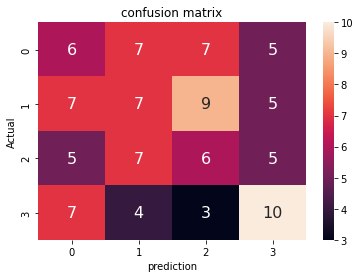

In [36]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [37]:
ensemble_model_1.save('/content/drive/MyDrive/Aknia/skripsi/bismillah/Ensemble/Ensemble_2_model_Inceptionv3_Densenet201.h5')

# Ensemble Resnet, Inception dan densenet

In [38]:
models_2 = [inception_model,resnet_model,densenet_model]
model_outputs_2 = [model(model_input) for model in models_2]
ensemble_output_2 = tf.keras.layers.Average()(model_outputs_2)
ensemble_model_2 = tf.keras.Model(inputs=model_input, outputs=ensemble_output_2)

In [39]:
optimizer = Adam(learning_rate=0.0001)

In [40]:
ensemble_model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# EVALUASI 3 Model (Incep, Resnet dan Dense)

In [ ]:
metrics_train = ensemble_model_2.evaluate(train_data)
metrics_test = ensemble_model_2.evaluate(uji_data)

7/7 [==============================] - 169s 23s/step - loss: 0.3255 - accuracy: 0.9700


In [ ]:
print(f"TRAIN_SET: {metrics_train}")
print("--------------------------------------------")
print(f"TEST_SET: {metrics_test}")

TRAIN_SET: [0.2581401765346527, 1.0]
--------------------------------------------
TEST_SET: [0.3254840075969696, 0.9700000286102295]


In [ ]:
# Predict the label of the test_images
import numpy as np
pred = ensemble_model_2.predict(uji_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 4 predictions: {pred[:4]}')

In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(uji_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   Penyu Hijau       0.35      0.32      0.33        25
  Penyu Lekang       0.36      0.40      0.38        25
   Penyu Sisik       0.16      0.16      0.16        25
Penyu Tempayan       0.33      0.32      0.33        25

      accuracy                           0.30       100
     macro avg       0.30      0.30      0.30       100
  weighted avg       0.30      0.30      0.30       100



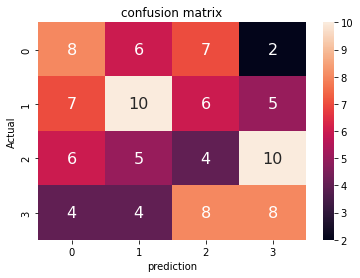

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [ ]:
ensemble_model_2.save('/content/drive/MyDrive/Aknia/skripsi/bismillah/Ensemble/Ensemble_3_model_Inceptionv3_Densenet201_Resnet152.h5')